## Introduction

In this notebook we preprocess a dataset of [Premier League statistics from season 2006/2007 to 2017/2018](https://www.kaggle.com/zaeemnalla/premier-league).

In [96]:
import pandas as pd
df = pd.read_csv('stats.csv')

## Data types

The data set has 42 columns.

In [97]:
len(df.columns)

42

All the columns except for Team and Season are numerical data types.

In [98]:
df.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

## Data quality

Analyzing the dataset we can see that values seem to be OK.

In [100]:
df.describe(include = 'all')

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
count,240,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,160.000000,240.000000,220.000000,240.000000,240.000000,240.000000,240
unique,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,Manchester United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-2007
freq,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
mean,NaN,14.150000,14.150000,51.062500,61.079167,2.862500,514.241667,168.116667,12.283333,9.016667,...,831.370833,207.191667,23908.962500,39.200000,4.991667,472.968182,0.837500,54.920833,22.783333,NaN
std,NaN,6.022482,5.596846,16.203474,10.078249,1.802442,95.979164,38.748882,4.820950,3.659077,...,118.551756,35.933177,3247.161627,13.391915,2.804646,84.653006,0.947718,18.780999,9.148869,NaN
min,NaN,1.000000,2.000000,20.000000,38.000000,0.000000,338.000000,94.000000,4.000000,1.000000,...,572.000000,136.000000,16772.000000,18.000000,0.000000,296.000000,0.000000,19.000000,4.000000,NaN
25%,NaN,10.000000,10.000000,40.000000,54.000000,1.000000,441.000000,140.000000,9.000000,6.000000,...,749.000000,180.000000,21577.000000,30.000000,3.000000,412.750000,0.000000,40.000000,17.000000,NaN
50%,NaN,12.000000,15.000000,47.000000,60.500000,3.000000,498.500000,158.500000,11.500000,9.000000,...,818.000000,201.000000,23168.500000,37.000000,5.000000,465.000000,1.000000,53.000000,22.000000,NaN
75%,NaN,18.000000,19.000000,61.000000,67.000000,4.000000,572.000000,194.250000,15.000000,12.000000,...,911.250000,230.000000,26294.000000,44.250000,7.000000,522.500000,1.000000,68.000000,27.000000,NaN


## Missing values

As we see, there are multiple columns that contain null values. We remove those values from dataset.

In [101]:
df.isnull().sum()

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

In [102]:
df.drop(columns=['saves', 'head_clearance', 'total_through_ball', 'total_through_ball', 'backward_pass', 'big_chance_missed', 'dispossessed'], inplace=True)

In [103]:
df.isnull().sum()

team                    0
wins                    0
losses                  0
goals                   0
total_yel_card          0
total_red_card          0
total_scoring_att       0
ontarget_scoring_att    0
hit_woodwork            0
att_hd_goal             0
att_pen_goal            0
att_freekick_goal       0
att_ibox_goal           0
att_obox_goal           0
goal_fastbreak          0
total_offside           0
clean_sheet             0
goals_conceded          0
outfielder_block        0
interception            0
total_tackle            0
last_man_tackle         0
total_clearance         0
own_goals               0
penalty_conceded        0
pen_goals_conceded      0
total_pass              0
total_long_balls        0
total_cross             0
corner_taken            0
touches                 0
clearance_off_line      0
penalty_save            0
total_high_claim        0
punches                 0
season                  0
dtype: int64

## Feature creation

As we can see, there is no column for draws or total matches so we can create that. After creating the columns we change their location.

In [104]:
df['draws'] = 38 - df['wins'] - df['losses']
df['total_matches'] = df['wins'] + df['losses'] + df['draws']
new_column = df.pop('draws')
df.insert(2, 'draws', new_column)
new_column = df.pop('total_matches')
df.insert(1, 'total_matches', new_column)

We can also create a column for points

In [105]:
def calculate_points(wins, draws):
    return 3 * wins + 1 * draws

df['points'] = calculate_points(df['wins'], df['draws'])
new_column = df.pop('points')
df.insert(5, 'points', new_column)

In [106]:
df.describe(include = 'all')

,team,total_matches,wins,draws,losses,points,goals,total_yel_card,total_red_card,total_scoring_att,...,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,season
count,240,240.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240
unique,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,Manchester United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-2007
freq,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
mean,NaN,38.0,14.150000,9.700000,14.150000,52.150000,51.062500,61.079167,2.862500,514.241667,...,15691.908333,2286.150000,831.370833,207.191667,23908.962500,4.991667,0.837500,54.920833,22.783333,NaN
std,NaN,0.0,6.022482,2.753773,5.596846,17.217122,16.203474,10.078249,1.802442,95.979164,...,3176.276737,295.618128,118.551756,35.933177,3247.161627,2.804646,0.947718,18.780999,9.148869,NaN
min,NaN,38.0,1.000000,3.000000,2.000000,11.000000,20.000000,38.000000,0.000000,338.000000,...,9478.000000,1462.000000,572.000000,136.000000,16772.000000,0.000000,0.000000,19.000000,4.000000,NaN
25%,NaN,38.0,10.000000,8.000000,10.000000,39.750000,40.000000,54.000000,1.000000,441.000000,...,13379.750000,2070.000000,749.000000,180.000000,21577.000000,3.000000,0.000000,40.000000,17.000000,NaN
50%,NaN,38.0,12.000000,10.000000,15.000000,47.000000,47.000000,60.500000,3.000000,498.500000,...,14937.000000,2276.500000,818.000000,201.000000,23168.500000,5.000000,1.000000,53.000000,22.000000,NaN
75%,NaN,38.0,18.000000,11.000000,19.000000,64.000000,61.000000,67.000000,4.000000,572.000000,...,18250.250000,2470.500000,911.250000,230.000000,26294.000000,7.000000,1.000000,68.000000,27.000000,NaN


Here is a sample of preprocessed dataset:

In [107]:
df.sample(n=30)

,team,total_matches,wins,draws,losses,points,goals,total_yel_card,total_red_card,total_scoring_att,...,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,season
54,Portsmouth,38.0,10.0,11.0,17.0,41.0,38.0,58.0,5.0,500.0,...,14497.0,2379.0,852.0,194.0,25414.0,9.0,1.0,79.0,26.0,2008-2009
145,Tottenham Hotspur,38.0,21.0,6.0,11.0,69.0,55.0,66.0,4.0,588.0,...,17933.0,2121.0,849.0,230.0,26241.0,3.0,1.0,41.0,38.0,2013-2014
64,Liverpool,38.0,18.0,9.0,11.0,63.0,61.0,55.0,5.0,642.0,...,18575.0,2454.0,1017.0,268.0,28704.0,1.0,1.0,52.0,28.0,2009-2010
192,AFC Bournemouth,38.0,11.0,9.0,18.0,42.0,45.0,53.0,1.0,464.0,...,17270.0,2484.0,749.0,221.0,25291.0,2.0,2.0,58.0,12.0,2015-2016
216,Watford,38.0,11.0,7.0,20.0,40.0,40.0,84.0,5.0,422.0,...,14049.0,2600.0,686.0,164.0,21547.0,3.0,1.0,53.0,35.0,2016-2017
206,Everton,38.0,17.0,10.0,11.0,61.0,62.0,72.0,2.0,502.0,...,17586.0,2968.0,767.0,196.0,25309.0,9.0,2.0,56.0,19.0,2016-2017
190,Swansea City,38.0,12.0,11.0,15.0,47.0,42.0,60.0,1.0,441.0,...,18169.0,2416.0,725.0,163.0,25989.0,2.0,0.0,85.0,34.0,2015-2016
88,Aston Villa,38.0,12.0,12.0,14.0,48.0,48.0,71.0,2.0,506.0,...,14611.0,1970.0,973.0,230.0,22681.0,7.0,0.0,30.0,25.0,2010-2011
83,Arsenal,38.0,19.0,11.0,8.0,68.0,72.0,65.0,6.0,654.0,...,20150.0,1462.0,928.0,252.0,28629.0,4.0,2.0,56.0,25.0,2010-2011
27,Blackburn Rovers,38.0,15.0,13.0,10.0,58.0,50.0,72.0,6.0,530.0,...,13650.0,2281.0,883.0,196.0,22599.0,5.0,2.0,59.0,27.0,2007-2008


# Anomaly detection
In anomaly detection, the goal is to find objects that do not conform to normal patterns or behavior. Often, anomalous objects are known as outliers, since, on a scatter plot of the data, they lie far away from other data points.

We import some important libraries that will help us find outliers and plot them.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

# Univariate outliers

## Boxplot

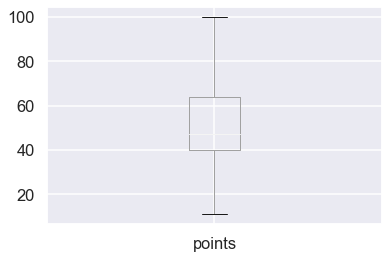

In [24]:
boxplot = df.boxplot(column=['points'])

In [25]:
ranges = [0,20,40,60,80,100]
df.groupby(pd.cut(df['points'], ranges)).count()

,team,total_matches,wins,draws,losses,points,goals,total_yel_card,total_red_card,total_scoring_att,...,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,season
points,,,,,,,,,,,,,,,,,,,,,
"(0, 20]",2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
"(20, 40]",64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
"(40, 60]",100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
"(60, 80]",52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
"(80, 100]",22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


## Standard deviation

The standard deviation is a measure of the amount of variation or dispersion of a set of values.

In [41]:
data = df['goals']
data_mean, data_std = data.mean(), data.std()
min_value, max_value = min(data), max(data)

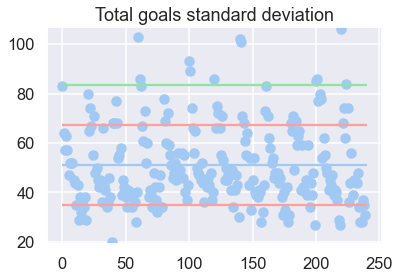

In [44]:

plt.title("Total goals standard deviation")
plt.ylim(min_value - 1, max_value + 1)
plt.scatter(x=df.index, y=data)
plt.hlines(y=data_mean, xmin=0, xmax=len(data))
plt.hlines(y=data_mean - data_std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=data_mean + data_std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=data_mean - 2 * data_std, xmin=0, xmax=len(data), colors='g')
plt.hlines(y=data_mean + 2 * data_std, xmin=0, xmax=len(data), colors='g')
plt.show()

In [46]:
df.loc[df['goals'] > 84]

,team,total_matches,wins,draws,losses,points,goals,total_yel_card,total_red_card,total_scoring_att,...,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,season
60,Chelsea,38.0,27.0,5.0,6.0,86.0,103.0,54.0,5.0,834.0,...,18852.0,2071.0,1083.0,286.0,28914.0,3.0,1.0,87.0,30.0,2009-2010
61,Manchester United,38.0,27.0,4.0,7.0,85.0,86.0,49.0,4.0,695.0,...,19318.0,2205.0,1156.0,297.0,28968.0,2.0,0.0,65.0,18.0,2009-2010
100,Manchester City,38.0,28.0,5.0,5.0,89.0,93.0,51.0,5.0,738.0,...,20863.0,1734.0,843.0,269.0,28620.0,6.0,1.0,39.0,21.0,2011-2012
101,Manchester United,38.0,28.0,5.0,5.0,89.0,89.0,51.0,1.0,646.0,...,20184.0,2189.0,1018.0,279.0,28113.0,3.0,1.0,37.0,26.0,2011-2012
120,Manchester United,38.0,28.0,5.0,5.0,89.0,86.0,57.0,1.0,561.0,...,19696.0,1973.0,962.0,218.0,27264.0,5.0,0.0,38.0,28.0,2012-2013
140,Manchester City,38.0,27.0,5.0,6.0,86.0,102.0,72.0,1.0,673.0,...,20761.0,1791.0,892.0,283.0,28341.0,0.0,0.0,64.0,31.0,2013-2014
141,Liverpool,38.0,26.0,6.0,6.0,84.0,101.0,54.0,1.0,651.0,...,19599.0,1895.0,643.0,224.0,28172.0,5.0,1.0,36.0,29.0,2013-2014
200,Chelsea,38.0,30.0,3.0,5.0,93.0,85.0,72.0,0.0,580.0,...,20125.0,2399.0,688.0,218.0,27658.0,3.0,0.0,38.0,18.0,2016-2017
201,Tottenham Hotspur,38.0,26.0,8.0,4.0,86.0,86.0,62.0,0.0,669.0,...,20150.0,2662.0,761.0,273.0,28150.0,1.0,0.0,21.0,11.0,2016-2017
220,Manchester City,38.0,32.0,4.0,2.0,100.0,106.0,59.0,2.0,665.0,...,28241.0,1775.0,691.0,284.0,35130.0,4.0,2.0,21.0,15.0,2017-2018


## Isolation forest


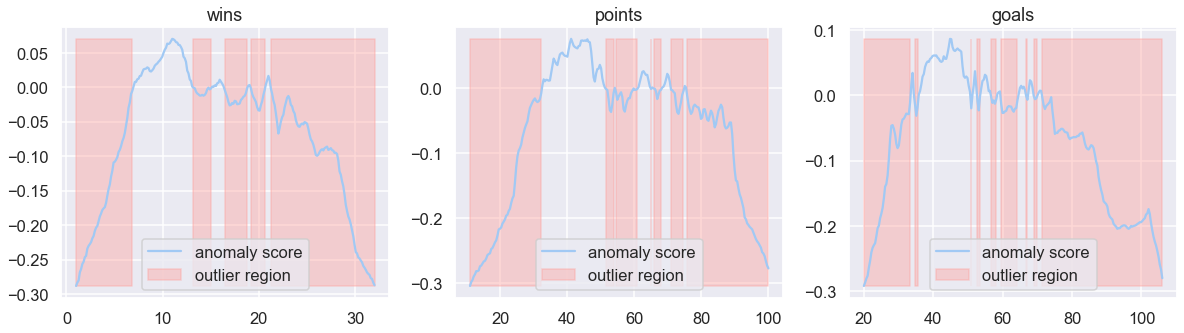

In [47]:
cols = ['wins', 'points', 'goals']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

# Multivariate

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

This is a clustering algorithm that is similar to k-means clustering. There are two parameters we control here. Eps which is the maximum distance between two samples for them to be considered in the same cluster, and min_samples which is the minimum number of points needed to form a cluster.

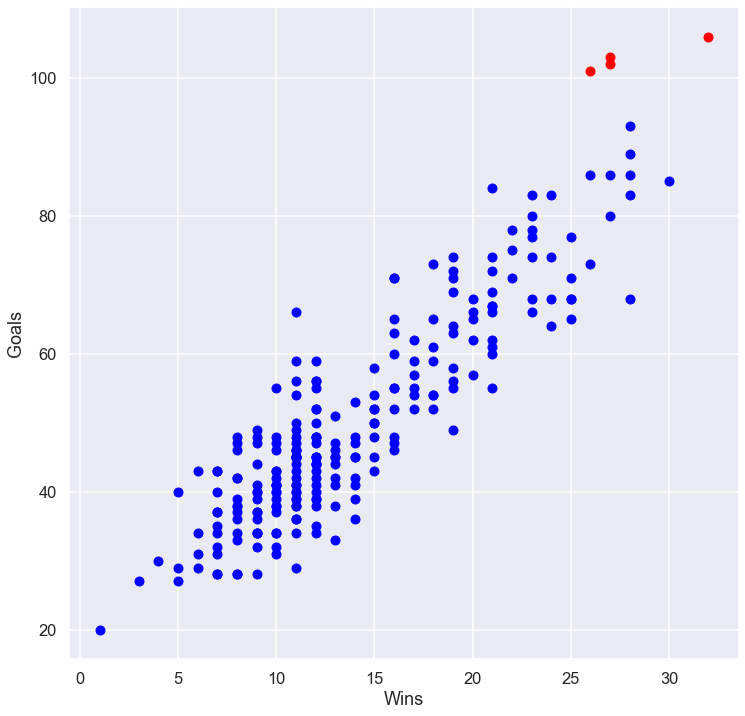

In [49]:
X = df[['wins','goals']].values

db = DBSCAN(eps=10.0, min_samples=10).fit(X)
labels = db.labels_

plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color, label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Wins');
plt.ylabel('Goals');

## Local Outlier Factor Method(LOF)

LOF is similar to DBSCAN but it looks at outliers in respect to the local neighborhood, not the global dataset.


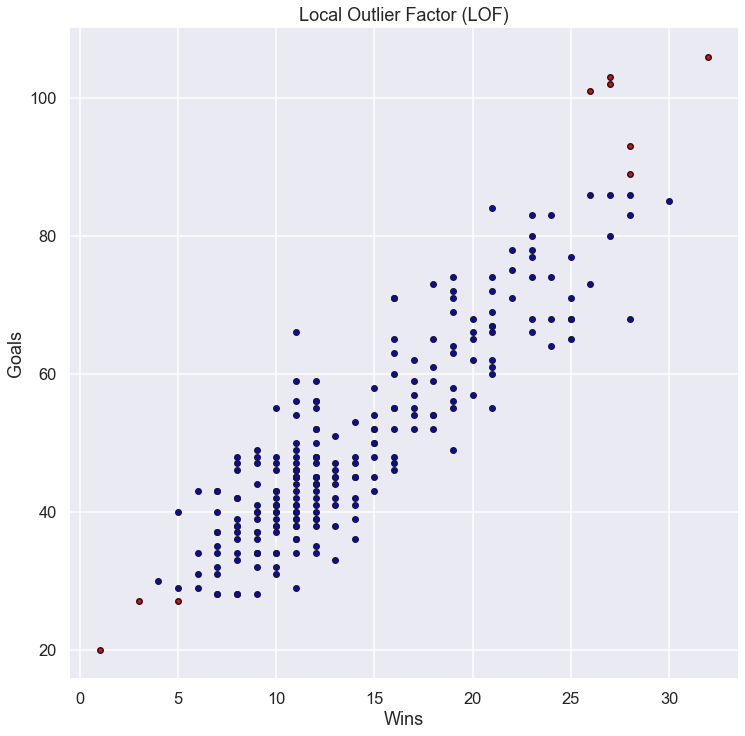

In [51]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df[['wins','goals']].values
y_pred = clf.fit_predict(X)

plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Wins');
plt.ylabel('Goals');
plt.show()

## Avoiding false discoveries



In [ ]:
import statistics
import math

### Z-test

A z-test calculates the z-score of a dataset. Simply put, a z-score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

Null Hypothesis: Goals do not increase with less wins

Alternate Hypothesis: Goals decrease with less wins

Population parameters: Mean = pop_mean_high, standard deviation = pop_std_high

Sample parameters: Mean = sample_mean_low, standard deviation = sample_std_low

In [175]:
goals_high = df[df.goals >= 60]
goals_low = df[df.goals < 60]

pop_mean_high = goals_high['wins'].mean()
pop_std_high = statistics.stdev(goals_high.wins)

goals_low_sample = goals_low.sample(frac=0.10)
sample_mean_low = goals_low_sample['wins'].mean()
sample_std_low = statistics.stdev(goals_low_sample.wins)

print('Population mean ' + str(pop_mean_high))
print('Population std ' + str(pop_std_high))
print('Sample mean ' + str(sample_mean_low))
print('Sample std ' + str(sample_std_low))
print('Number of rows ' + str(len(goals_low_sample.index)))

Population mean 22.253968253968253
Population std 4.036000311583854
Sample mean 10.555555555555555
Sample std 3.39934634239519
Number of rows 18


In [176]:
# Confidence Level 95%  for one sided Normal curve
zscore_critical = 1.65 

# Calculate the test statistics 
zscore_test_stat = ((sample_mean_low - pop_mean_high) * math.sqrt(320)) / sample_std_low
print(zscore_test_stat)
print('Null hypothesis is {}'.format(zscore_test_stat >= -zscore_critical and zscore_test_stat <= zscore_critical))

-61.56112002183624
Null hypothesis is False


# Data Exploration and Visualisation

The top 10 teams with most wins

In [69]:
# Creating a new dataframe to find the total wins, losses, draws, total_matches by grouping teams
df1 = df.groupby('team').agg({'wins':'sum', 'losses':'sum', 'draws':'sum', 'total_matches':'sum'})
# Sorting the teams with most wins and getting the top 10 teams
df1 = df1.sort_values(by = 'wins', ascending = False)
df1.head(10)

,wins,losses,draws,total_matches
team,,,,
Manchester United,290.0,77.0,89.0,456.0
Chelsea,276.0,79.0,101.0,456.0
Manchester City,256.0,107.0,93.0,456.0
Arsenal,255.0,94.0,107.0,456.0
Liverpool,234.0,103.0,119.0,456.0
Tottenham Hotspur,228.0,116.0,112.0,456.0
Everton,185.0,130.0,141.0,456.0
West Ham United,127.0,181.0,110.0,418.0
Newcastle United,116.0,171.0,93.0,380.0


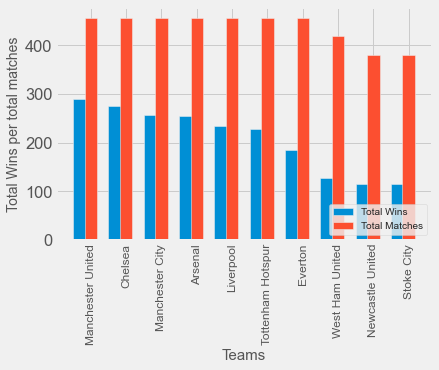

In [71]:
teams = df1.index[:10]
wins = df1.wins[:10]
matches = df1.total_matches[:10]
plt.style.use('fivethirtyeight')
# using x_index so that the bars can be placed side by side
x_index = np.arange(len(teams))
plt.bar(x_index - 0.25, wins, width = 0.5, label = 'Total Wins')
plt.bar(teams, matches, width = 0.35, label = 'Total Matches')
plt.ylabel('Total Wins per total matches', size = 14)
plt.xlabel('Teams', size = 15)
plt.xticks(rotation = 'vertical', size = 12)
plt.legend(loc = 4, prop = {'size': 10})
plt.show()

### The top 10 teams with most losses

In [72]:
# Creating a new dataframe 
df2 = df.sort_values(by = 'losses', ascending = False)
df2.head(10)

,wins,losses,draws,total_matches
team,,,,
West Ham United,127.0,181.0,110.0,418.0
Sunderland,95.0,181.0,104.0,380.0
Newcastle United,116.0,171.0,93.0,380.0
Stoke City,116.0,155.0,109.0,380.0
West Bromwich Albion,93.0,154.0,95.0,342.0
Aston Villa,113.0,150.0,117.0,380.0
Everton,185.0,130.0,141.0,456.0
Fulham,87.0,128.0,89.0,304.0
Wigan Athletic,70.0,126.0,70.0,266.0


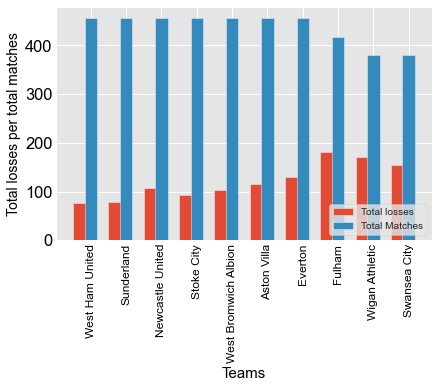

In [73]:
lost_teams = df2.index[:10]
losses = df.losses[:10]
total_matches = df.total_matches[:10]
plt.style.use('ggplot')
x_index2 = np.arange(len(lost_teams))
plt.bar(x_index2 - 0.25, losses, width = 0.5, label = 'Total losses')
plt.bar(lost_teams, total_matches, width = 0.35, label = 'Total Matches')
plt.ylabel('Total losses per total matches', size = 14, color = 'black')
plt.xlabel('Teams', size = 15, color = 'black')
plt.xticks(rotation = 'vertical', size = 12, color = 'black')
plt.yticks(color = 'black')
plt.legend(loc = 4, prop = {'size': 10})
plt.show()

## Premier League Top 6 Statistics

### Total goals of the Top 6

<AxesSubplot:title={'center':'Top 6 goals in Premier League'}, xlabel='team'>

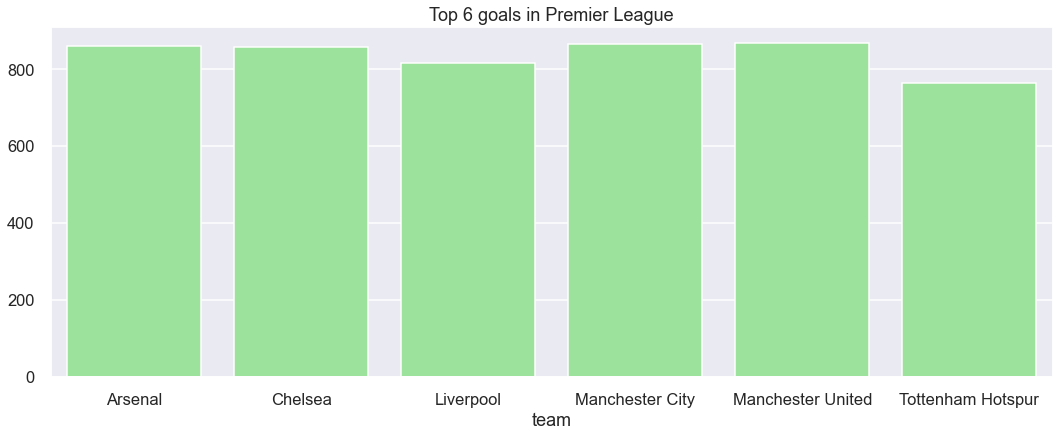

In [128]:
top6 = ['Tottenham Hotspur','Manchester United', 'Liverpool', 'Manchester City', 'Arsenal', 'Chelsea']
top6df = df[df.team.isin(top6)]
plt.figure(figsize=(16,6))
teams =  top6df.groupby('team')['goals'].sum()
plt.title('Top 6 goals in Premier League')
sns.barplot(x=teams[:10].keys(), y=teams[:10].values, color="lightgreen")

### Total goals conceded by Top 6

<AxesSubplot:title={'center':'Top 6 goals conceded in Premier League'}, xlabel='team'>

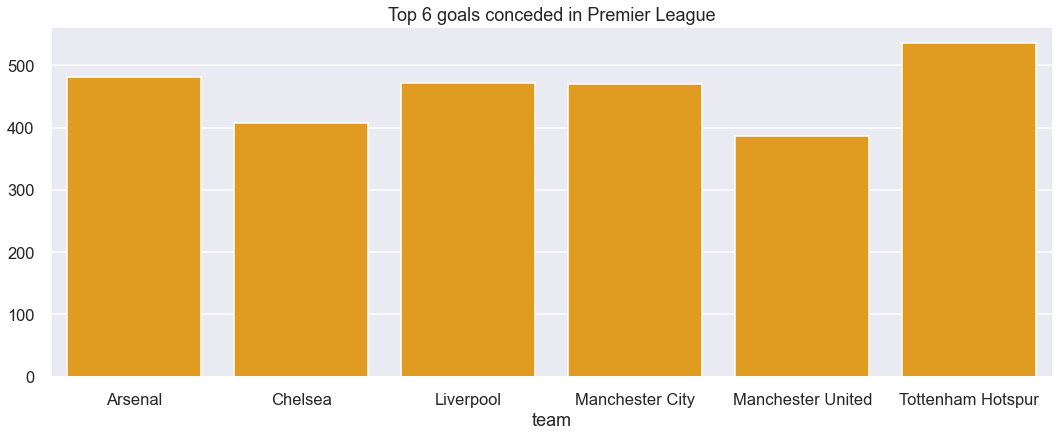

In [134]:
plt.figure(figsize=(16,6))
teams =  top6df.groupby('team')['goals_conceded'].sum()
plt.title('Top 6 goals conceded in Premier League')
sns.barplot(x=teams[:10].keys(), y=teams[:10].values, color="orange")

### Total passes by Top 6

<AxesSubplot:title={'center':'Top 6 most passes'}, xlabel='team'>

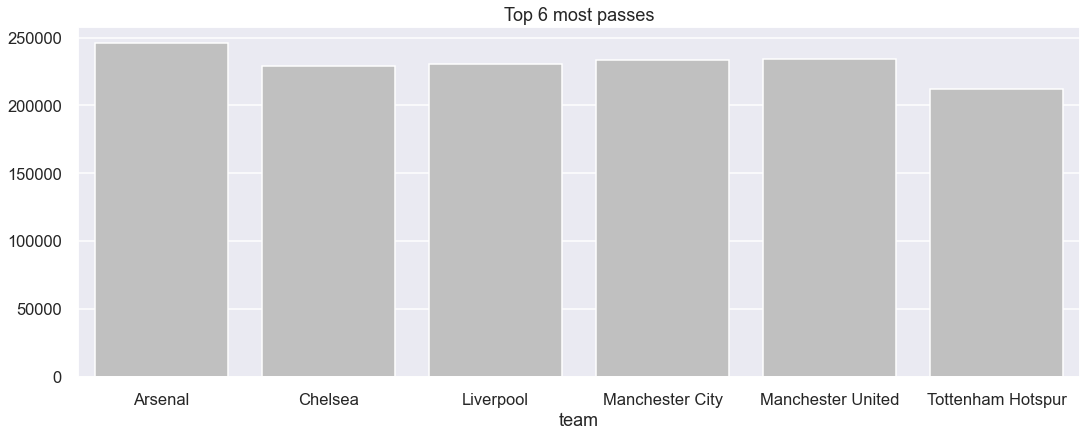

In [135]:
plt.figure(figsize=(16,6))
teams =  top6df.groupby('team')['total_pass'].sum()
plt.title('Top 6 most passes')
sns.barplot(x=teams[:10].keys(), y=teams[:10].values, color="silver")

### Total penalties conceded by Top 6

<AxesSubplot:title={'center':'Top 6 penalty conceded'}, xlabel='team'>

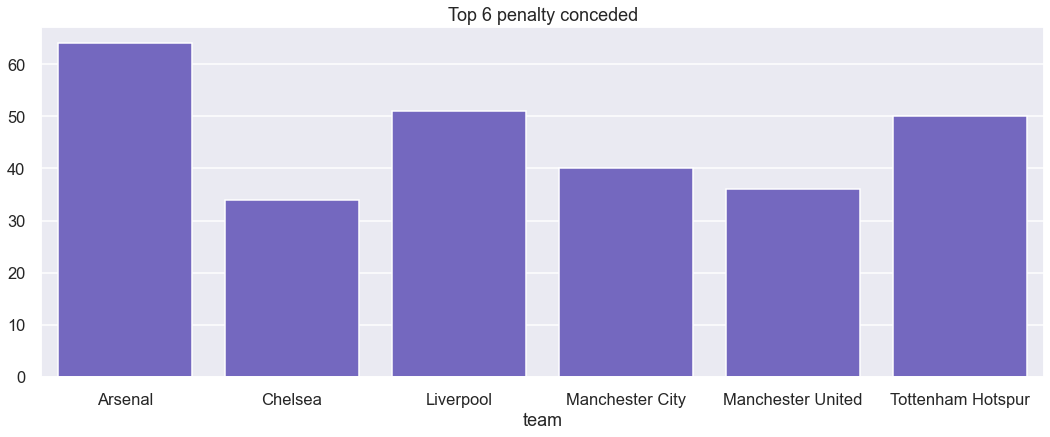

In [136]:
plt.figure(figsize=(16,6))
teams =  top6df.groupby('team')['penalty_conceded'].sum()
plt.title('Top 6 penalty conceded')
sns.barplot(x=teams[:10].keys(), y=teams[:10].values, color="slateblue")

### Top 10 scoring chances and on target chances

Finding the top 10 teams with most scoring chances and on-target chances

In [77]:
df3 = df.groupby('team').agg({'total_scoring_att':'sum', 'ontarget_scoring_att':'sum'})
df3 = df3.sort_values(by = 'total_scoring_att', ascending = False)
df3.head(10)

,total_scoring_att,ontarget_scoring_att
team,,
Chelsea,7882.0,2667.0
Liverpool,7868.0,2606.0
Tottenham Hotspur,7405.0,2532.0
Arsenal,7339.0,2652.0
Manchester United,7200.0,2530.0
Manchester City,7175.0,2502.0
Everton,6153.0,2086.0
West Ham United,5428.0,1708.0
Newcastle United,4803.0,1539.0


Plotting the chances created vs on-target chances for top 10 teams

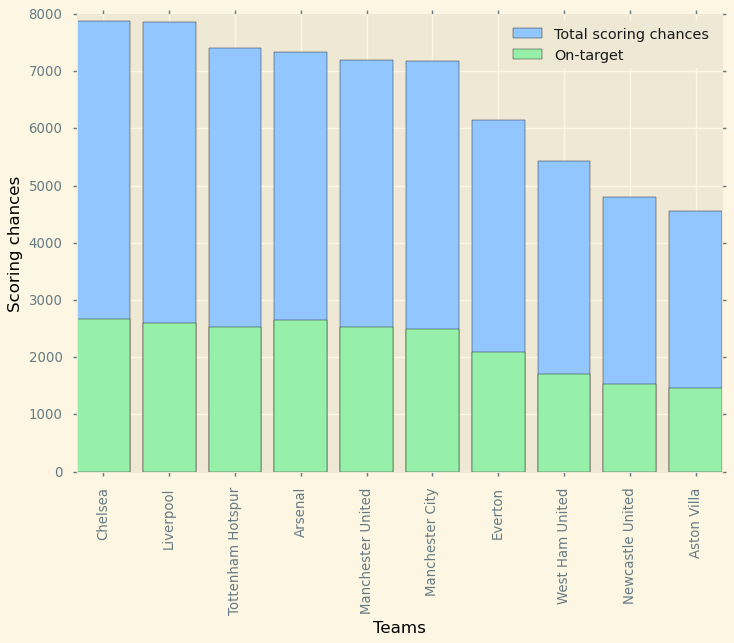

In [140]:
teams = df3.index[:10]
scoring_chances = df3.total_scoring_att[:10]
ontarget = df3.ontarget_scoring_att[:10]
# Using seaborn style plot
plt.style.use('seaborn-talk')
plt.bar(teams, scoring_chances, label = 'Total scoring chances')
plt.bar(teams, ontarget, label = 'On-target')
plt.xlabel('Teams', size = 15, color = 'black')
plt.ylabel('Scoring chances', size = 15, color = 'black')
plt.xticks(rotation = 'vertical', size = 12)
plt.yticks(size = 12)
plt.legend()
plt.show()

/Users/elironkryeziu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Total tackles ')

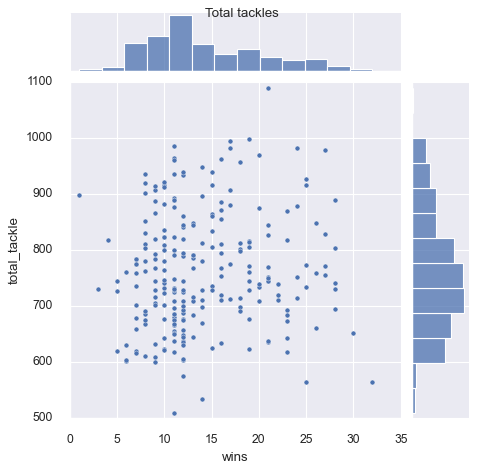

In [156]:
p = sns.jointplot("wins", "total_tackle", df)
p.fig.suptitle("Total tackles ")

Finding the champion for every season from 2006/07 to 2017/2018

In [82]:
df4 = df.groupby('season').first()
df4

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
season,,,,,,,,,,,,,,,,,,,,,
2006-2007,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,NaN,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0
2007-2008,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,NaN,936.0,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0
2008-2009,Manchester United,28.0,4.0,68.0,61.0,5.0,715.0,230.0,9.0,7.0,...,NaN,1039.0,257.0,30077.0,NaN,3.0,579.0,0.0,56.0,22.0
2009-2010,Chelsea,27.0,6.0,103.0,54.0,5.0,834.0,288.0,13.0,16.0,...,NaN,1083.0,286.0,28914.0,NaN,3.0,503.0,1.0,87.0,30.0
2010-2011,Manchester United,23.0,4.0,78.0,56.0,3.0,618.0,212.0,15.0,18.0,...,2411.0,1005.0,243.0,26671.0,50.0,2.0,471.0,0.0,45.0,16.0
2011-2012,Manchester City,28.0,5.0,93.0,51.0,5.0,738.0,250.0,21.0,10.0,...,2937.0,843.0,269.0,28620.0,65.0,6.0,480.0,1.0,39.0,21.0
2012-2013,Manchester United,28.0,5.0,86.0,57.0,1.0,561.0,213.0,24.0,14.0,...,2727.0,962.0,218.0,27264.0,65.0,5.0,506.0,0.0,38.0,28.0
2013-2014,Manchester City,27.0,6.0,102.0,72.0,1.0,673.0,238.0,19.0,10.0,...,3195.0,892.0,283.0,28341.0,59.0,0.0,411.0,0.0,64.0,31.0
2014-2015,Chelsea,26.0,3.0,73.0,73.0,4.0,564.0,210.0,15.0,10.0,...,3259.0,682.0,226.0,27861.0,40.0,2.0,476.0,0.0,73.0,13.0


### Number of times a team being a champion

In [88]:
winner_df = df4.groupby('team').agg({'team':'count'})
winner_df = winner_df.rename(columns = {'team': 'titles'})
winner_df

,titles
team,
Chelsea,3
Leicester City,1
Manchester City,3
Manchester United,5


Plotting the number of times a team being a champion using pie chart

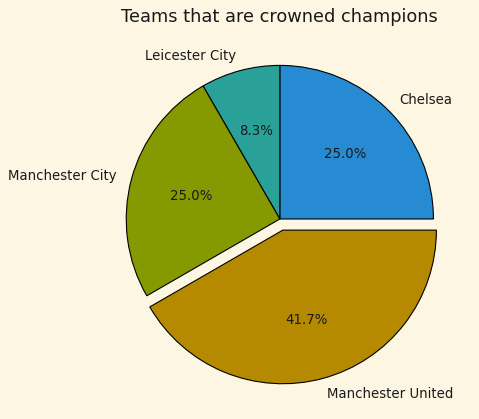

In [138]:
team = winner_df.index
champ = winner_df.titles
explode = [0,0,0,0.075]
plt.style.use('Solarize_Light2')
plt.pie(champ, labels = team , explode = explode, wedgeprops = {'edgecolor':'black'}, autopct='%1.1f%%')
plt.title('Teams that are crowned champions')
plt.show()